## Text Analysis of Amazon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv('Review Amazon 8-8-2019 Training(Apr2016 to July2018).csv', delimiter = ',')

In [4]:
dataset.head()

,ASIN,Product Title,Product Review URL,Review Rating,Review Date,Review Title,Review Text,Verified Review,Variation ASIN,Sku,Color
0,B074N7C482,"Modern Outdoor Garden, Patio 4 Piece Seat - Wi...",https://www.amazon.com/gp/review/R3CU4J2FU1FH1C,3,12/31/2017,Three Stars,"Installed and not used yet as winter sets in, ...",Yes,B074N7WYNV,RTN25-BLK-RED,Black
1,B01G67EUJW,Divano Roma Furniture Collection - Modern Two ...,https://www.amazon.com/gp/review/R2QAY39ZRHH7PP,1,12/31/2017,One Star,Cheap quality. Okay for staging,Yes,B01G67EUJM,EXP40-SM-VV-BG,Beige
2,B018YEC3HG,Deluxe Espresso Brown Bonded Leather Platform ...,https://www.amazon.com/gp/review/RKWZ16GUYSJ2B,1,12/31/2017,A complete waste of our hard earned money,Do Not Buy!! You will constantly need to tight...,Yes,B018YEC3Z8,BDS-02-EX-QUEEN,NaN
3,B074N7C482,"Modern Outdoor Garden, Patio 4 Piece Seat - Wi...",https://www.amazon.com/gp/review/R2E4HYVPYYSO4V,5,12/30/2017,Nice set!,I gave it to my parents as a Christmas gift fo...,Yes,B074N7C482,RTN25-BR-BG,Brown
4,B01M1HGYIK,Modern Tufted Fabric Living Room Armchair (Lig...,https://www.amazon.com/gp/review/R1NSQLVE9NS6RS,5,12/30/2017,Love these chairs/Great price,I really like these chairs. I had never purcha...,Yes,B01LZV1RCP,ARM(M)02-FB-1S-GR,Light Grey


In [5]:
df = dataset.iloc[:, [3, 6]]

In [6]:
df.head()

,Review Rating,Review Text
0,3,"Installed and not used yet as winter sets in, ..."
1,1,Cheap quality. Okay for staging
2,1,Do Not Buy!! You will constantly need to tight...
3,5,I gave it to my parents as a Christmas gift fo...
4,5,I really like these chairs. I had never purcha...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Data columns (total 2 columns):
Review Rating    6013 non-null int64
Review Text      6013 non-null object
dtypes: int64(1), object(1)
memory usage: 94.0+ KB


In [8]:
df.describe()

,Review Rating
count,6013.000000
mean,3.696325
std,1.516788
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [9]:
# Encoding the rating 4,5 stars to 2 (good), 1,2,3 stars to 0 (bad)
for i in range(0, df.shape[0]):
    if df.at[i,'Review Rating'] > 3:
        df.at[i,'Score'] = 1
    elif df.at[i,'Review Rating'] < 4:
        df.at[i,'Score'] = 0

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
df = df.drop(['Review Rating'], axis = 1)

In [11]:
df.head()

,Review Text,Score
0,"Installed and not used yet as winter sets in, ...",0.0
1,Cheap quality. Okay for staging,0.0
2,Do Not Buy!! You will constantly need to tight...,0.0
3,I gave it to my parents as a Christmas gift fo...,1.0
4,I really like these chairs. I had never purcha...,1.0


In [12]:
lines = [("I don't like this sofa !", 0), ("I really don't love it.", 0), ("I don't like the color as it does not match the description.", 0),
        ("I don't like the material.", 0), ("I don't love the material.", 0),("I don't love the color as it does not match the description.", 0),
        ("I don't love this sofa !", 0)]
df2 = pd.DataFrame(lines, columns = ['Review Text' , 'Score']) 

In [13]:
df = df.append(df2,ignore_index=True)

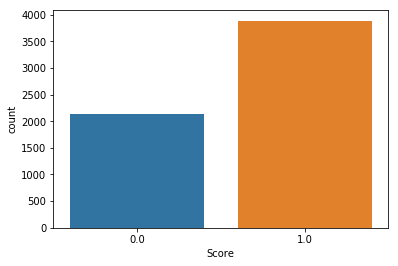

In [14]:
import seaborn as sns
sns.countplot(df['Score'],label="Count")

In [15]:
df.rename(columns={'Review Text': 'Review'}, inplace=True)

In [16]:
df[df['Score']==1]['Review'][:10,]

3     I gave it to my parents as a Christmas gift fo...
4     I really like these chairs. I had never purcha...
5                We really enjoy it has many many uses.
6     Looks pretty. Bought it for my waiting room at...
8     Nice chair and works fine but with a short bac...
9                 My mom loves the chair.  Comfortable.
10    Very nice stylish sofa !\nEasy to install and ...
12                                            ez set up
13    The couch is nice and was fairly easy to put t...
15    I gave this 4 stars because and YES, I do know...
Name: Review, dtype: object

In [17]:
df[df['Score']==0]['Review'][:10,]

0     Installed and not used yet as winter sets in, ...
1                       Cheap quality. Okay for staging
2     Do Not Buy!! You will constantly need to tight...
7     The price was right, shipping was prompt.\nHad...
11                    Uncomfortable but nice to look at
14    Poor quality futon. It's extremely uncomfortab...
24    I am/was extremely disappointed with this item...
28    DON'T BUY IT !!!!!!!!!!\nWhen you get everythi...
31    Received this with the back of the couch broke...
33    No instructions, missing parts, missing slots ...
Name: Review, dtype: object

### CountVectorizer

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [28]:
l_w = ['aren',"aren't","couldn'",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'don',"don't","hadn't",'hasn',
       "hasn't",'isn',"isn't",'mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'no','nor','not',"shan't",'shouldn',
       "shouldn't",'wasn',"wasn't","won't",'wouldn',"wouldn't"]
for i in l_w:
    stop_words.discard(i)

In [29]:
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'd', 'did', 'do', 'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', 'has', 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', 'she', "she's", 'should', "should've", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'we', 'were', 'weren', "weren't", 'what', 'wh

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Score'], test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,ngram_range = (1,3),tokenizer = token.tokenize, max_features = 10000)
cv.fit(df['Review'])
xtrain_count = cv.transform(X_train)
xtest_count = cv.transform(X_test)

### Tfidf

In [ ]:
# word level tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=20000,stop_words=stop_words)
tfidf_vect.fit(df['Review'])
xtrain_tfidf =  tfidf_vect.transform(X_train)
xtest_tfidf =  tfidf_vect.transform(X_test)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,3), max_features=20000,
                                  stop_words=stop_words)
tfidf_vect_ngram.fit(df['Review'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=20000,
                                        stop_words=stop_words)
tfidf_vect_ngram_chars.fit(df['Review'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test) 

### Word Embeddings

In [ ]:
# load the pre-trained word-embedding vectors 
#from keras.preprocessing import text, sequence
#embeddings_index = {}
#for i, line in enumerate(open('wiki-news-300d-1M.vec')):
#    values = line.split()
#    embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
# 
# create a tokenizer 
#token = text.Tokenizer()
#token.fit_on_texts(df['Review'])
#word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
#train_seq_x = sequence.pad_sequences(token.texts_to_sequences(X_train), maxlen=70)
#test_seq_x = sequence.pad_sequences(token.texts_to_sequences(X_test), maxlen=70)

# create token-embedding mapping
#embedding_matrix = np.zeros((len(word_index) + 1, 300))
#for word, i in word_index.items():
#    embedding_vector = embeddings_index.get(word)
#    if embedding_vector is not None:
#        embedding_matrix[i] = embedding_vector

## Model building

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_test):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_test)  
    
    return metrics.accuracy_score(predictions, y_test)

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
# Naive Bayes on Count Vectors
accuracy = train_model(MultinomialNB(), xtrain_count, y_train, xtest_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf, y_train, xtest_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

### LogisticRegression

In [ ]:
# Linear Classifier on Count Vectors
accuracy = train_model(LogisticRegression(), xtrain_count, y_train, xtest_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf, y_train, xtest_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)

### SVM

In [ ]:
# SVM on Count Vectors
accuracy = train_model(LinearSVC(), xtrain_count, y_train, xtest_count)
print("SVM, Count Vectors: ", accuracy)

# SVM on Word Level TF IDF Vectors
accuracy = train_model(LinearSVC(), xtrain_tfidf, y_train, xtest_tfidf)
print("SVM, WordLevel TF-IDF: ", accuracy)

# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(LinearSVC(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

# SVM on Character Level TF IDF Vectors
accuracy = train_model(LinearSVC(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars)
print("SVM, CharLevel Vectors: ", accuracy)

### Randon Forest

In [ ]:
# Randon Forest on Count Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_count, y_train, xtest_count)
print("Randon Forest, Count Vectors: ", accuracy)

# Randon Forest on Word Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf, y_train, xtest_tfidf)
print("Randon Forest, WordLevel TF-IDF: ", accuracy)

# Randon Forest on Ngram Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train, xtest_tfidf_ngram)
print("Randon Forest, N-Gram Vectors: ", accuracy)

# Randon Forest on Character Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_chars, y_train, xtest_tfidf_ngram_chars)
print("Randon Forest, CharLevel Vectors: ", accuracy)

In [ ]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
    model_name = model.__class__.__name__
    print ("Currently fitting: {}".format(model_name))
    accuracies = cross_val_score(model, xtrain_tfidf_ngram, y_train, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [ ]:
cv_df

In [ ]:
print("Mean accuracy of LinearSVC =", cv_df.iloc[[5,6,7,8,9], 2].mean())
print("Mean accuracy of LogisticRegression =", cv_df.iloc[[15,16,17,18,19], 2].mean())
print("Mean accuracy of MultinomialNB =", cv_df.iloc[[10,11,12,13,14], 2].mean())

In [ ]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

## Neural Networks

#### ANN

In [ ]:
#from keras import layers, models, optimizers
#from keras.models import Sequential
#from keras.layers import Dense
#classifier1 = Sequential()
#classifier1.add(Dense(units=36, activation="relu", input_dim=xtrain_tfidf_ngram.shape[1]))
#classifier1.add(Dense(units=36, activation="relu"))
#classifier1.add(Dense(units=3, activation="softmax"))
#classifier1.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
#classifier1.fit(xtrain_tfidf_ngram, y_train_dummy, batch_size=10, epochs=3)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
svm = LinearSVC()
svm.fit(xtrain_tfidf_ngram, y_train)
svm_y_pred = svm.predict(xtest_tfidf_ngram)
svm_cm = metrics.confusion_matrix(y_test, svm_y_pred, [0,1])
score = svm.score(xtest_tfidf_ngram, y_test)
sns.heatmap(svm_cm, annot=True)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('LinearSVC')
print(classification_report(y_test, svm_y_pred))
print("The accuracy score is:", score, '\n')

In [ ]:
def plot_coefficients(classifier, feature_names, top_features=50):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(20, 10))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

In [ ]:
plot_coefficients(svm, tfidf_vect_ngram.get_feature_names())

In [ ]:
def split_list(a_list):
    half = len(a_list)//2
    return a_list[:half], a_list[half:]

In [ ]:
def most_power_words (classifier, tfidf, nb_words):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-nb_words:]
    top_negative_coefficients = np.argsort(coef)[:nb_words]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    feature_names=tfidf.get_feature_names()
    feature_names = np.array(feature_names)
    coeff = np.arange(1, 1 + 2 * nb_words)
    top_feature_names = feature_names[top_coefficients]
    top_negative_feature_names,top_positive_feature_names = split_list(top_feature_names)
    return print("Top 50 positives words: ",top_positive_feature_names, 
                 "\n \n Top 50 negatives words: ",top_negative_feature_names)

In [ ]:
most_power_words (svm, tfidf_vect_ngram, 50)

# Most common word using ML

In [ ]:
dataset_ML = pd.read_excel('Test (EXP54).xlsx')

In [ ]:
df_ML = dataset_ML.iloc[:, [3, 6]]

In [ ]:
for i in range(0, df_ML.shape[0]):
    if df_ML.at[i,'Review Rating'] > 3:
        df_ML.at[i,'Score'] = 1
    elif df_ML.at[i,'Review Rating'] < 4:
        df_ML.at[i,'Score'] = 0

In [ ]:
df_ML = df_ML.drop(['Review Rating'], axis = 1)
df_ML.rename(columns={'Review Text': 'Review'}, inplace=True)

In [ ]:
df_ML.head()

In [ ]:
X_df_ML = df_ML.iloc[:,0]
y_df_ML = df_ML.iloc[:,1]

In [ ]:
X_df_ML_tfidf = tfidf_vect_ngram.transform(X_df_ML)

In [ ]:
y_df_ML_pred = svm.predict(X_df_ML_tfidf)

In [ ]:
cm_test = confusion_matrix(y_df_ML, y_df_ML_pred)
cm_test

In [ ]:
d = ["Small but good extra sleeper for the price"]
d_tfidf = tfidf_vect_ngram.transform(d)
d_pred = svm.predict(d_tfidf)
d_pred

In [ ]:
y_df_ML_pred = pd.DataFrame(y_df_ML_pred)

In [ ]:
df_ML_pred = pd.concat([X_df_ML, y_df_ML_pred], axis=1)

In [ ]:
df_ML_pred.rename(columns={0: 'Score'}, inplace=True)

In [ ]:
df_ML_pred.shape

In [ ]:
df_ML_pred.head()

In [ ]:
df_ML_pred_bad = df_ML_pred.loc[df_ML_pred['Score'] == 0]

In [ ]:
df_ML_pred_bad.head()

In [ ]:
df_ML_pred_bad.shape

In [ ]:
df_ML_pred_good = df_ML_pred.loc[df_ML_pred['Score'] == 1]

In [ ]:
df_ML_pred_good.head()

In [ ]:
df_ML_pred_good.shape

In [ ]:
bad_reviews_ML = ''
for x in df_ML_pred_bad['Review']:
    bad_reviews_ML = bad_reviews_ML + str(x)

In [ ]:
good_reviews_ML = ''
for i in df_ML_pred_good['Review']:
    good_reviews_ML = good_reviews_ML + str(i)

In [ ]:
import re
from nltk.util import ngrams
from nltk import everygrams
from collections import Counter

def count_words(s, n_gram_min, n_gram_max, nb_words):
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    filtered_sentence = [] 
    for w in tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    output = list(everygrams(filtered_sentence, n_gram_min, n_gram_max))
    c = Counter(output)
    counts = c.most_common(nb_words)
    return counts

In [ ]:
count_bad_2_words_reviews_ML = count_words(bad_reviews_ML, 2, 2, 10)

In [ ]:
count_bad_3_words_reviews_ML = count_words(bad_reviews_ML, 3, 3, 10)

In [ ]:
count_bad_2_words_reviews_ML

In [ ]:
count_bad_3_words_reviews_ML

In [ ]:
from sklearn.externals import joblib
import pickle
pickle.dump(svm, open("/Users/DG/Desktop/SOFAMANIA/model_svm.pkl","wb"))

# Most common word whithout ML

In [ ]:
dataset = pd.read_excel('EXP02.xlsx')

In [ ]:
df = dataset.iloc[:, [3, 6]]

In [ ]:
for i in range(0, df.shape[0]):
    if df.at[i,'Review Rating'] > 3:
        df.at[i,'Score'] = 1
    elif df.at[i,'Review Rating'] < 4:
        df.at[i,'Score'] = 0

In [ ]:
df = df.drop(['Review Rating'], axis = 1)
df.rename(columns={'Review Text': 'Review'}, inplace=True)

In [ ]:
df.head()

In [ ]:
df_bad = df.loc[df['Score'] == 0]

In [ ]:
df_bad.shape

In [ ]:
df_bad.head()

In [ ]:
df_good = df.loc[df['Score'] == 1]

In [ ]:
df_good.shape

In [ ]:
df_good.head()

In [ ]:
bad_reviews = ''
for x in df_bad['Review']:
    bad_reviews = bad_reviews + str(x)

In [ ]:
good_reviews = ''
for i in df_good['Review']:
    good_reviews = good_reviews + str(i)

In [ ]:
count_bad_2_words_reviews = count_words(bad_reviews, 2, 2, 40)

In [ ]:
count_bad_3_words_reviews = count_words(bad_reviews, 3, 3, 50)

In [ ]:
count_bad_2_words_reviews

In [ ]:
count_bad_3_words_reviews

In [ ]:
count_good_2_words_reviews = count_words(good_reviews, 2, 2, 40)

In [ ]:
count_good_3_words_reviews = count_words(good_reviews, 3, 3, 50)

In [ ]:
count_good_2_words_reviews

In [ ]:
count_good_3_words_reviews